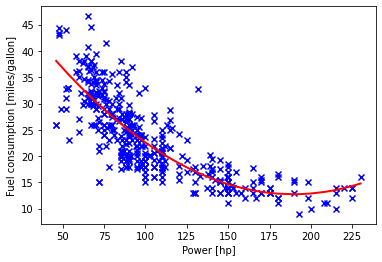

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

# read cars dataset, a clean data set
cars = pd.read_csv('auto-mpg.data.txt',header=None, sep='\s+')


# extract mpg values
y = cars.iloc[:,0].values

# extract horsepower values
X = cars.iloc[:,[3]].values
X = X.reshape(X.size, 1)

# precompute polynomial features
poly = preprocessing.PolynomialFeatures(2)
Xp = poly.fit_transform(X)

# fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(Xp,y)

# coefficients
reg.intercept_ # 56.900099702112925
reg.coef_ # [-0.46618963, 0.00123054]

# compute correlation coefficient
np.corrcoef(reg.predict(Xp),y) # 0.82919179 (from 0.77842678)

# compute mean squared error (MSE)
sum((reg.predict(Xp) - y)**2) / len(y) # 18.984768907617223 ( from 23.943662938603104)

### plot

hp = cars.iloc[:,3].values
mpg = cars.iloc[:,0].values

hps = np.array(sorted(hp))
hps = hps.reshape(hps.size, 1)
hpsp = poly.fit_transform(hps)

plt.scatter(hp, mpg, color='blue', marker='x')
plt.plot(hps, reg.predict(hpsp), color='red', lw=2)
plt.xlabel('Power [hp]')
plt.ylabel('Fuel consumption [miles/gallon]')
plt.show()

